In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
%%time
df = pd.read_csv('data/SPAM text message 20170820 - Data.csv')
print(f'Shape of DataFrame: {df.shape}')
df.head()

Shape of DataFrame: (5572, 2)
CPU times: user 11.9 ms, sys: 2.85 ms, total: 14.8 ms
Wall time: 14.4 ms


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Main stats

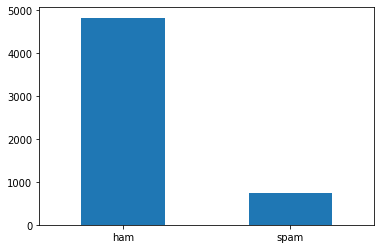

In [15]:
df['Category'].value_counts().plot.bar(rot=0)
plt.show()

In [29]:
mean_symbols = int(df.Message.str.len().mean())
median_symbols = int(df.Message.str.len().median())

print(f"Среднее кол-во символов в строке: {mean_symbols}")
print(f"Медианное кол-во символов в строке: {median_symbols}")

Среднее кол-во символов в строке: 80
Медианное кол-во символов в строке: 61


In [30]:
mean_words = int(df.Message.str.split(' ').apply(lambda x: len(x)).mean())
median_words = int(df.Message.str.split(' ').apply(lambda x: len(x)).median())

print(f"Среднее кол-во слов в строке: {mean_words}")
print(f"Медианное кол-во слов в строке: {median_words}")

Среднее кол-во слов в строке: 15
Медианное кол-во слов в строке: 12


# Train simple model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
tfidf = TfidfVectorizer()

X_cat = df.drop('Category', axis=1).Message.values.tolist()
y = df.drop('Message', axis=1)

X = tfidf.fit_transform(X_cat)

In [110]:
clf = LogisticRegression()

In [111]:
clf.fit(X, y.Category.values.tolist())

LogisticRegression()

In [112]:
msg = 'You are a winner U have been specially selected 2 receive ¬£1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+)'
msg_transfort = tfidf.transform([msg])


In [113]:
clf.predict(msg_transfort).tolist()

['spam']

# Save models to Pickle

In [116]:
import pickle

In [120]:
pickle.dump(tfidf, open("tfidf.pkl", "wb"))

In [121]:
pickle.dump(clf, open("logreg_model.sav", "wb"))

---

# Test API

In [122]:
import requests

In [140]:
requests.post(
    'http://127.0.0.1:5000/predict', 
    json={
        "text": """You are a winner U have been specially selected 2 receive ¬£1000
        or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+)"""
    }
).text

'{"predictions": ["spam"]}'

---